# Split trials in train and test set

We want two datasets, one for fitting our models and one for testing them once we are done with model selection.

We have data in a main DataFrame and some more in a dictionary of np.array. We need to separate them similarly.

## Load the data set and inspect

In [1]:
import pandas as pd
import numpy as np
import os.path
import pickle
from sklearn.model_selection import train_test_split
from autopipy.project import Project


In /home/kevin/anaconda3/envs/DLC-GPU/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/kevin/anaconda3/envs/DLC-GPU/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/kevin/anaconda3/envs/DLC-GPU/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/kevin/anaconda3/envs/DLC-GPU/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/kev

In [2]:
projectName="autopi_behavior_2021"
dataPath="/adata/projects/autopi_behavior_2021"
dlcModelPath="/adata/models"
myProject = Project(name=projectName,dataPath=dataPath,dlcModelPath=dlcModelPath)

Project name: autopi_behavior_2021
dataPath: /adata/projects/autopi_behavior_2021
dlcModelPath: /adata/models


In [3]:
fn =  myProject.dataPath+"/results/trialsDF.csv"
df = pd.read_csv(fn)

In [4]:
fn = myProject.dataPath+"/results/speedProfile.pkl"
print(fn)
sProfile = pickle.load(open(fn, "rb" ) )

/adata/projects/autopi_behavior_2021/results/speedProfile.pkl


In [5]:
if sProfile["searchTotal"].shape[0] != len(df):
    print("Problem with the length of sProfile and df")

Get a first idea of the number of trials we have in our dataset.

In [6]:
print("Number of mice : {}".format(len(df.subject.unique())))
print("Number of sessions : {}".format(len(df.sessionName.unique())))
print("Number of trials : {}".format(len(df)))
print("Percentage of invalid trials: {:.3} %".format(len(df[df.valid==False])/len(df)*100))
print("Number of dark trials: {}".format(len(df[df.light=="dark"])))
print("Number of light trials: {}".format(len(df[df.light=="light"])))
print("Median number of trials per session: {}".format(df.sessionName.value_counts().median()))
print("Mean number of trials per session: {:.3}".format(df.sessionName.value_counts().mean()))
print("Minimum number of trials per session: {}".format(df.sessionName.value_counts().min()))
print("Maximum number of trials per session: {}".format(df.sessionName.value_counts().max()))

Number of mice : 13
Number of sessions : 67
Number of trials : 4787
Percentage of invalid trials: 1.75 %
Number of dark trials: 2194
Number of light trials: 2593
Median number of trials per session: 73.0
Mean number of trials per session: 71.4
Minimum number of trials per session: 36
Maximum number of trials per session: 104


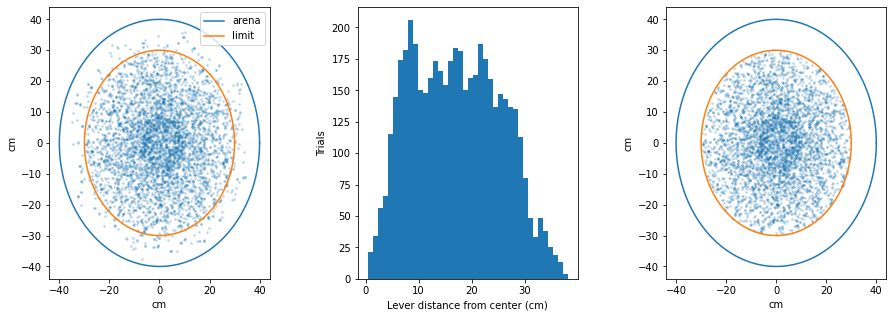

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

# to remove trials at the edge
maxDistance=30

df["leverDistanceCenter"] = np.sqrt((df.leverPressX.values**2 + df.leverPressY.values**2))

fig, axes = plt.subplots(1,3,figsize=(15,5))

plt.subplots_adjust(wspace=0.4)
#axes[0].set_aspect('equal', adjustable='box')

axes[0].scatter(df.leverPressX,df.leverPressY,s=3,alpha=0.2)
arena=np.arange(start=0,stop=2*np.pi,step=0.02)
axes[0].plot(np.cos(arena)*40,np.sin(arena)*40,label="arena")
axes[0].plot(np.cos(arena)*maxDistance,np.sin(arena)*maxDistance,label="limit")
axes[0].set_xlabel("cm")
axes[0].set_ylabel("cm")
axes[0].legend(loc="best")


axes[1].hist(df.leverDistanceCenter,bins=40)
axes[1].set_xlabel("Lever distance from center (cm)")
axes[1].set_ylabel("Trials")

# clean the dataset from these trials
boolIndices = df.leverDistanceCenter<maxDistance
df = df[boolIndices]

axes[2].scatter(df.leverPressX,df.leverPressY,s=3,alpha=0.2)
arena=np.arange(start=0,stop=2*np.pi,step=0.02)
axes[2].plot(np.cos(arena)*40,np.sin(arena)*40,label="arena")
axes[2].plot(np.cos(arena)*30,np.sin(arena)*30,label="limit")
axes[2].set_xlabel("cm")
axes[2].set_ylabel("cm")
plt.show()

In [8]:
print("Number of trials : {}".format(len(df)))
print("Percentage of invalid trials: {:.3} %".format(len(df[df.valid==False])/len(df)*100))
print("Number of dark trials: {}".format(len(df[df.light=="dark"])))
print("Number of light trials: {}".format(len(df[df.light=="light"])))
print("Median number of trials per session: {}".format(df.sessionName.value_counts().median()))
print("Mean number of trials per session: {:.3}".format(df.sessionName.value_counts().mean()))
print("Minimum number of trials per session: {}".format(df.sessionName.value_counts().min()))
print("Maximum number of trials per session: {}".format(df.sessionName.value_counts().max()))

Number of trials : 4520
Percentage of invalid trials: 1.48 %
Number of dark trials: 2063
Number of light trials: 2457
Median number of trials per session: 70.0
Mean number of trials per session: 67.5
Minimum number of trials per session: 33
Maximum number of trials per session: 100


In [9]:
# remove the same trials from the sProfile
for k in sProfile :
    sProfile[k] = sProfile[k][boolIndices,:]
    

In [10]:
if sProfile["searchTotal"].shape[0] != len(df):
    print("Problem with the length of sProfile and df")

## We don't create a test set

I initially plan to have a train and test sets. It was not required in the end so all trials went to the training set.

The notebooks doing the analysis are reading `trialsTrainSet.csv`

In [11]:

#trialsTrainSet, trialsTestSet = train_test_split(df,test_size=0.0,random_state=42)
trialsTrainSet = df
print("Length train: {}".format(len(trialsTrainSet)))
fn =  myProject.dataPath+"/results/trialsTrainSet.csv"
trialsTrainSet.to_csv(fn)
#fn =  myProject.dataPath+"/results/trialsTestSet.csv"
#trialsTestSet.to_csv(fn)

Length train: 4520


In [12]:
# sProfile
dTestSet = {}
dTrainSet = {}
for k in sProfile :
    #dTrainSet[k], dTestSet[k] = train_test_split(sProfile[k],test_size=0.2,random_state=42)
    dTrainSet[k] = sProfile[k]
    print("Length train: {}".format(dTrainSet[k].shape[0]))

# save our data as pickle objects (2 dictionaraies of np.arrays)    
fn =  myProject.dataPath+"/results/sProfileTrainSet.pkl"
print("saving pickle {}".format(fn))
pickle.dump(dTrainSet,open(fn,"wb"))
#print("saving pickle {}".format(fn))
#fn =  myProject.dataPath+"/results/sProfileTestSet.pkl"
#pickle.dump(dTestSet,open(fn,"wb"))

Length train: 4520
Length train: 4520
Length train: 4520
Length train: 4520
Length train: 4520
Length train: 4520
Length train: 4520
saving pickle /adata/projects/autopi_behavior_2021/results/sProfileTrainSet.pkl
